![](https://seeklogo.com/images/N/nba-75-years-logo-7E38B318A3-seeklogo.com.png)

# **Initial EDA**
## CPSC322 Final Project
### Everett Johnson
### Luke Martin
### April 18, 2022
### NBA Team Success Predictor

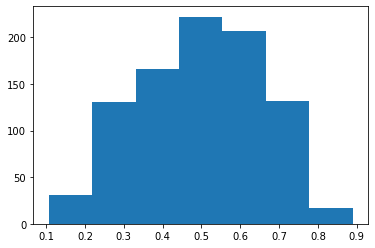

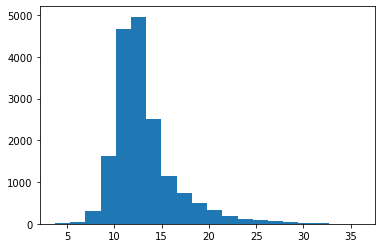

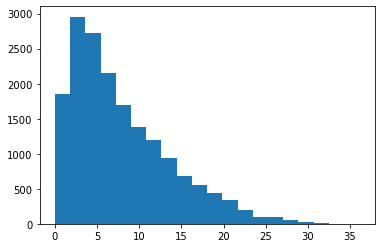

In [5]:
import matplotlib.pyplot as plt
import os
from mysklearn.mypytable import MyPyTable

file_loc = os.path.join("input_data", "processed_data", "team_info.csv")
team_data = MyPyTable().load_from_file(file_loc)

win_percentage = team_data.get_column("Win Percentage")
plt.figure()
plt.hist(win_percentage, bins=7)
plt.show()

file_loc = os.path.join("input_data", "processed_data", "player_stats.csv")
player_data = MyPyTable().load_from_file(file_loc)

jppg = player_data.get_column("JPPG")
plt.figure()
plt.hist(jppg, bins=20)
plt.show()

ppg = player_data.get_column("PTS")
plt.figure()
plt.hist(ppg, bins=20)
plt.show()